In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz : 나무 구조 생성 및 저장
# from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.확장자 파일 불러오기 등)
# import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

# 나무 구조 시각화  
from sklearn.tree import plot_tree


In [2]:
matplotlib.rc("font", family = "Malgun Gothic")

### 데이터 구성하기

In [3]:
df_raw = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/Concrete.CSV")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["strength"]
df_raw_x = df_raw.drop("strength", axis=1, inplace = False)

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (618, 8)
train data Y size : (618,)
test data X size : (412, 8)
test data Y size : (412,)


> train 데이터는 618개, test 데이터는 412개이다.

### 모델 생성
#### 기본 옵션으로 모델 생성

In [7]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.980
Score on test set : 0.904


> training set과 test set에 대해 결정계수를 구해보았더니 둘 다 결정계수가 1에 가까우며 엄청 높게 나왔다.   
  모델 설명력이 train 98%, test 90%로 모델은 train 데이터에 과적합한 것을 알 수 있다.   
  그래서 랜덤포레스트 모델 생성을 통해 모델 parameter를 조정하여 train 데이터의 과적합을 방지하는 것을 분석 목적으로 둔다.

In [8]:
rf_uncustomized

RandomForestRegressor(random_state=1234)

#### 모델 Parameter 조정
##### - n_estimators : 트리 수 변경에 따른 모델 성능

In [9]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf =RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [10]:
# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.973,0.905
1,20,0.978,0.905
2,30,0.979,0.903
3,40,0.979,0.905
4,50,0.980,0.905
5,60,0.980,0.906
6,70,0.980,0.906
7,80,0.980,0.906
8,90,0.980,0.905
9,100,0.980,0.904


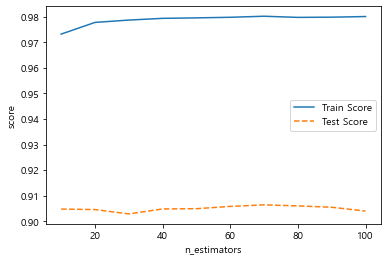

In [11]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

> 생성하는 결정 트리의 수가 증가함에 따라 모델의 설명력도 증가한다. 그런데 확인해보니 train, test 데이터의 설명력은 거의 변동이 없다.    
  그래서 나머지 파라미터의 영향을 확인해보기 위해 100을 선택해보았다.

##### - min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [21]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators=100, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [22]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.980,0.904
1,2,0.967,0.900
2,3,0.953,0.893
3,4,0.939,0.882
4,5,0.926,0.872
5,6,0.915,0.862
6,7,0.904,0.854
7,8,0.896,0.848
8,9,0.888,0.838
9,10,0.878,0.827


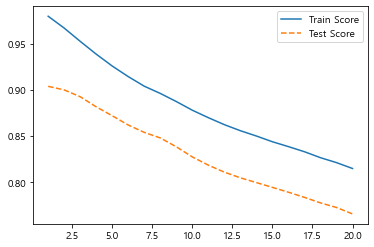

In [23]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label= "Test Score")
plt.legend()

> 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능을 확인해보려고 하였다.   
  자료수 증가에 따라 모델의 설명력이 감소하는 것은 당연한데 test 데이터도 train 데이터와 동일하게 급격하게 하락하는 것을 확인할 수 있다. 
  그래서 파라미터 선택이 힘들었는데 test 데이터의 정확도 변화를 고려해서 8로 선택했다.

##### - min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [27]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100,  min_samples_leaf=8,
                                min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.896,0.848
1,6,0.896,0.848
2,8,0.896,0.848
3,10,0.896,0.848
4,12,0.896,0.848
5,14,0.896,0.848
6,16,0.896,0.848
7,18,0.892,0.843
8,20,0.887,0.837
9,22,0.882,0.831


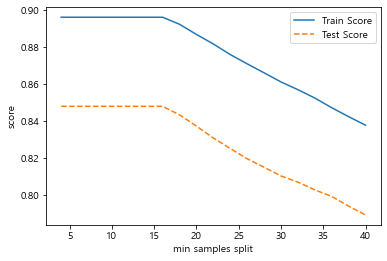

In [28]:
plt.plot(para_split, train_score, linestyle = "-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

> 분리 노드의 최소 자료 수가 증가하면 모델의 설명력은 감소한다. train과 test 데이터의 성능 변화를 고려하여   
  급격하게 결정계수가 하락하는 구간을 확인하여 16를 선택하였다.

##### - max_depth : 최대 깊이 변경에 따른 모델 성능

In [29]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators=100, min_samples_leaf=8,
                                min_samples_split = 16, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score


In [30]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.337,0.329
1,2,0.619,0.595
2,3,0.741,0.698
3,4,0.815,0.772
4,5,0.865,0.821
5,6,0.886,0.840
6,7,0.893,0.846
7,8,0.895,0.848
8,9,0.896,0.848
9,10,0.896,0.848


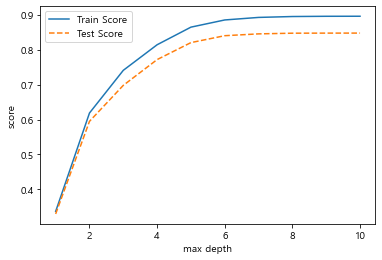

In [31]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

> 최대 깊이 증가에 따라 모델의 설명력은 좋아지는데, train/test 성능 변화를 고려하여 4를 선택한다.

### 최종 모델 선정

In [32]:
####################################
rf_final = RandomForestRegressor(n_estimators=100, min_samples_leaf=8, min_samples_split=16,
                                  max_depth=4, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.815
Score on test set : 0.772


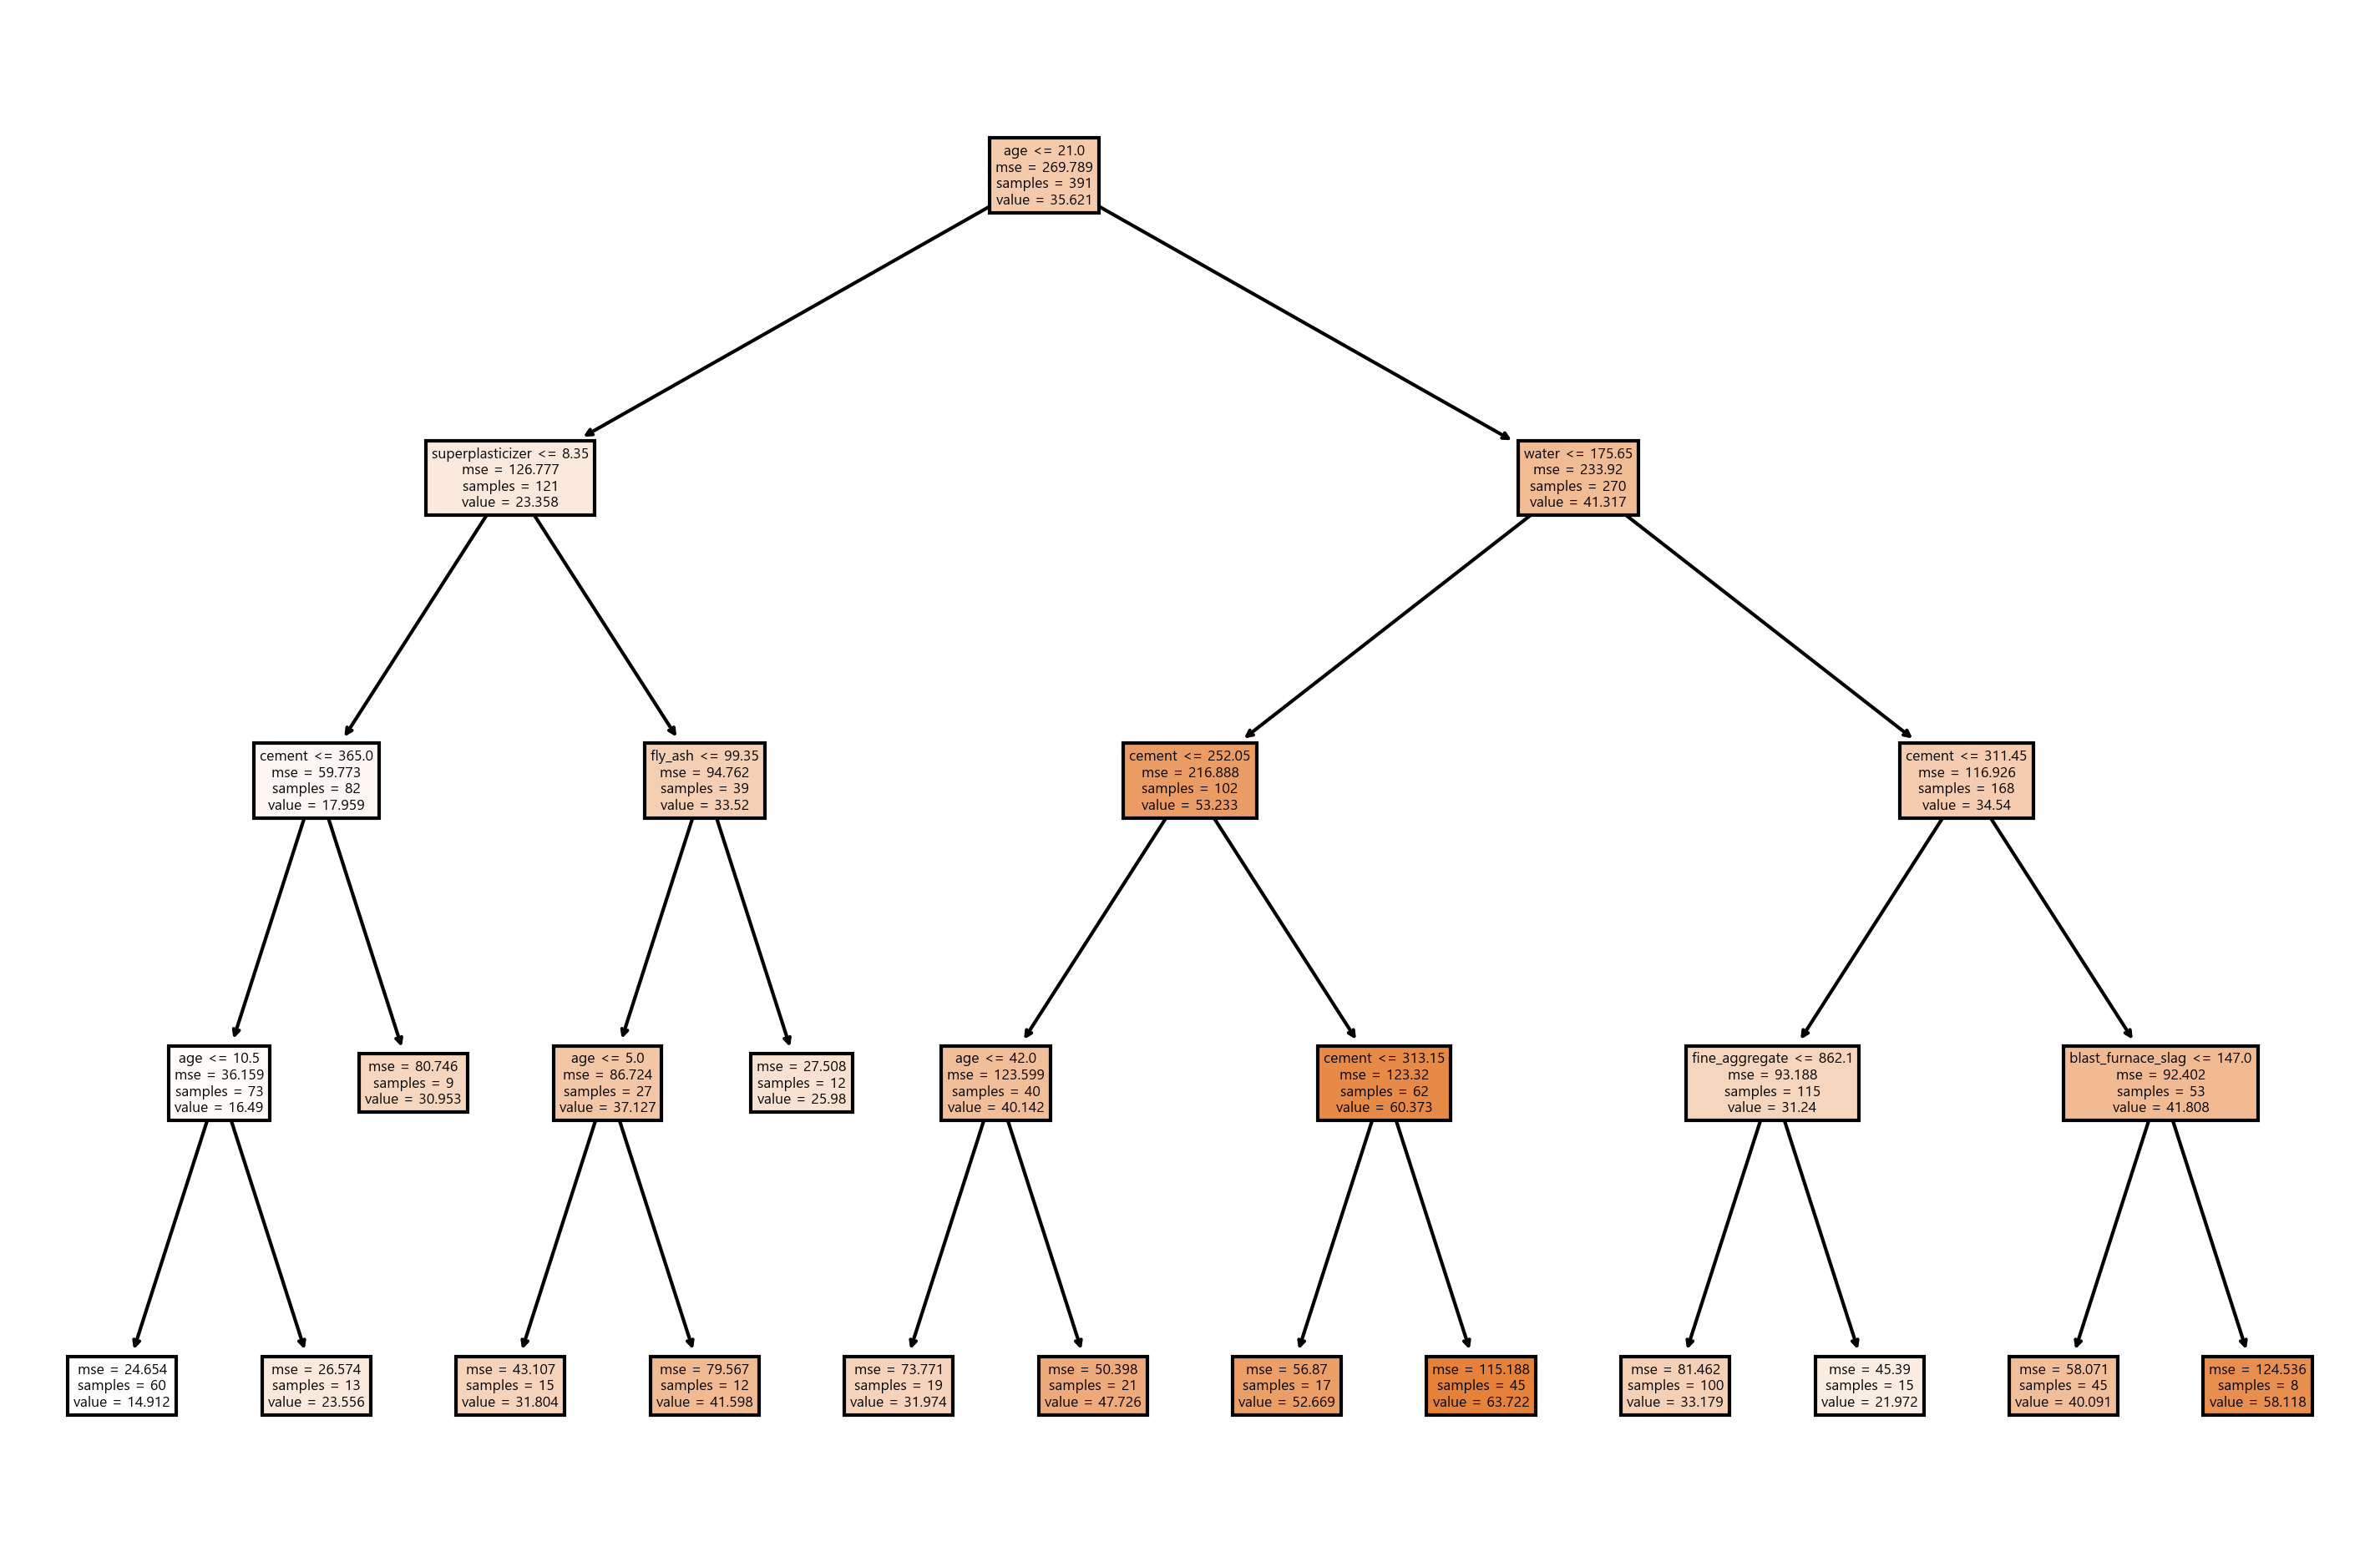

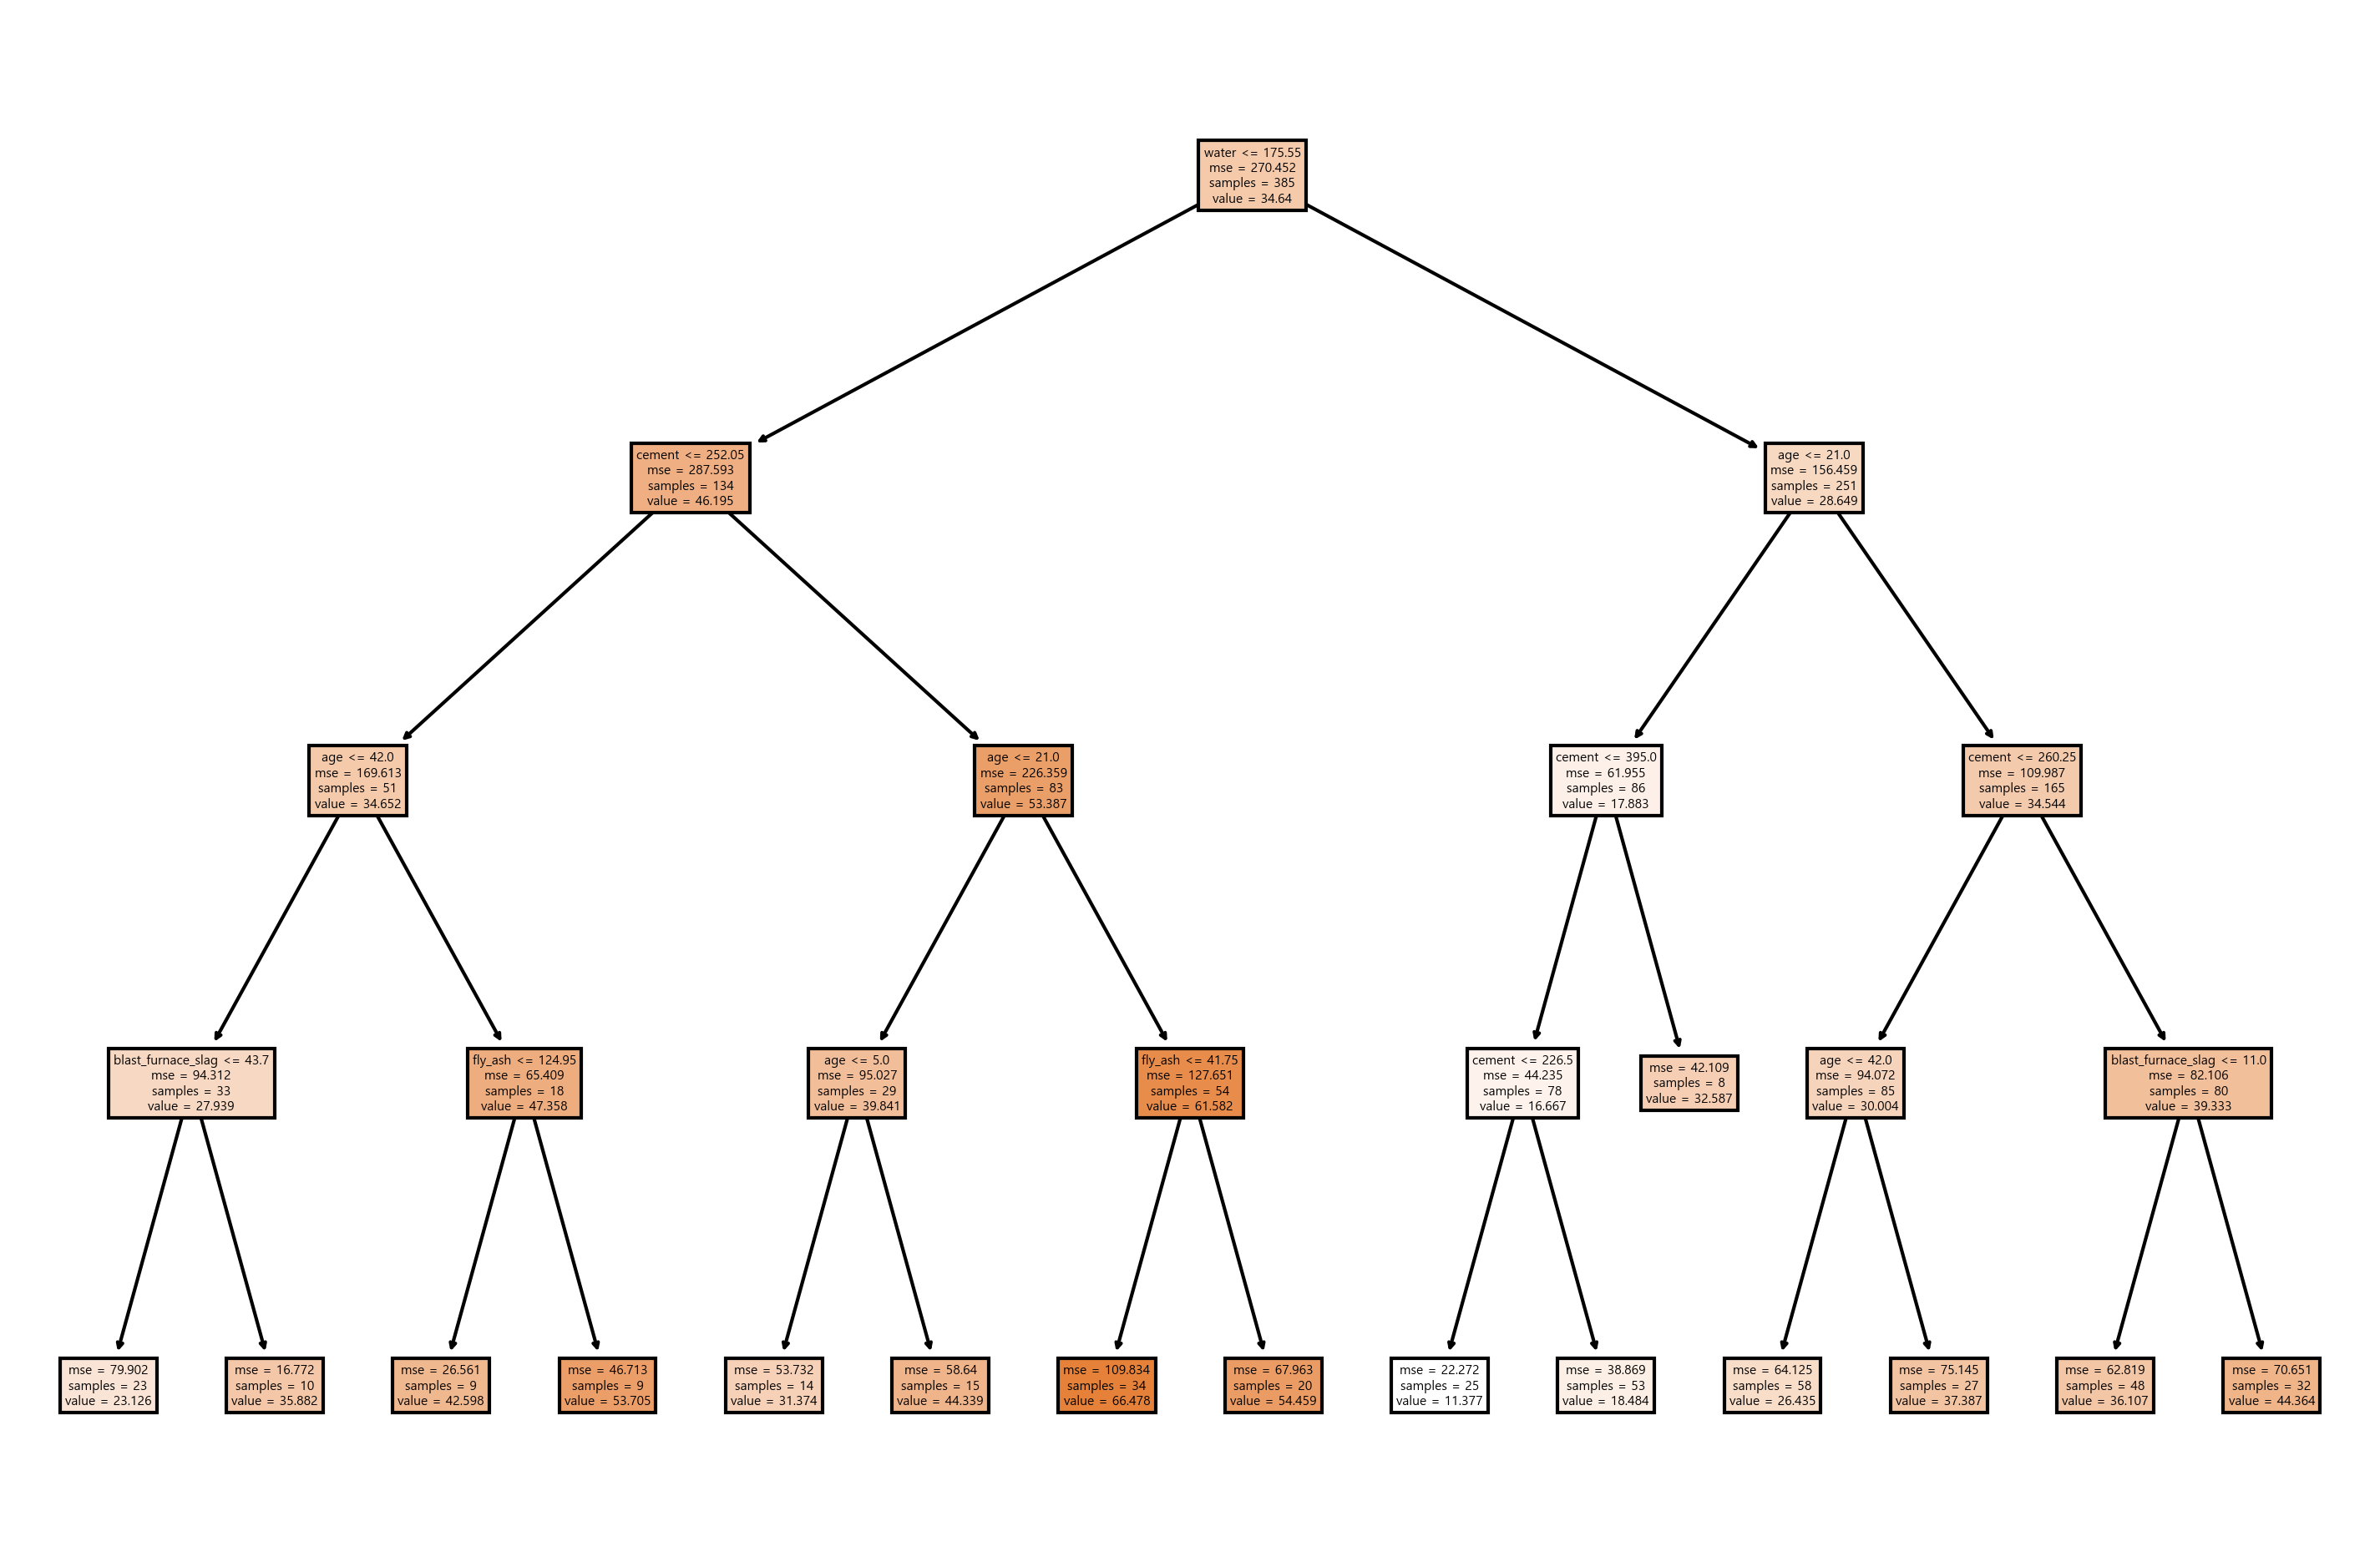

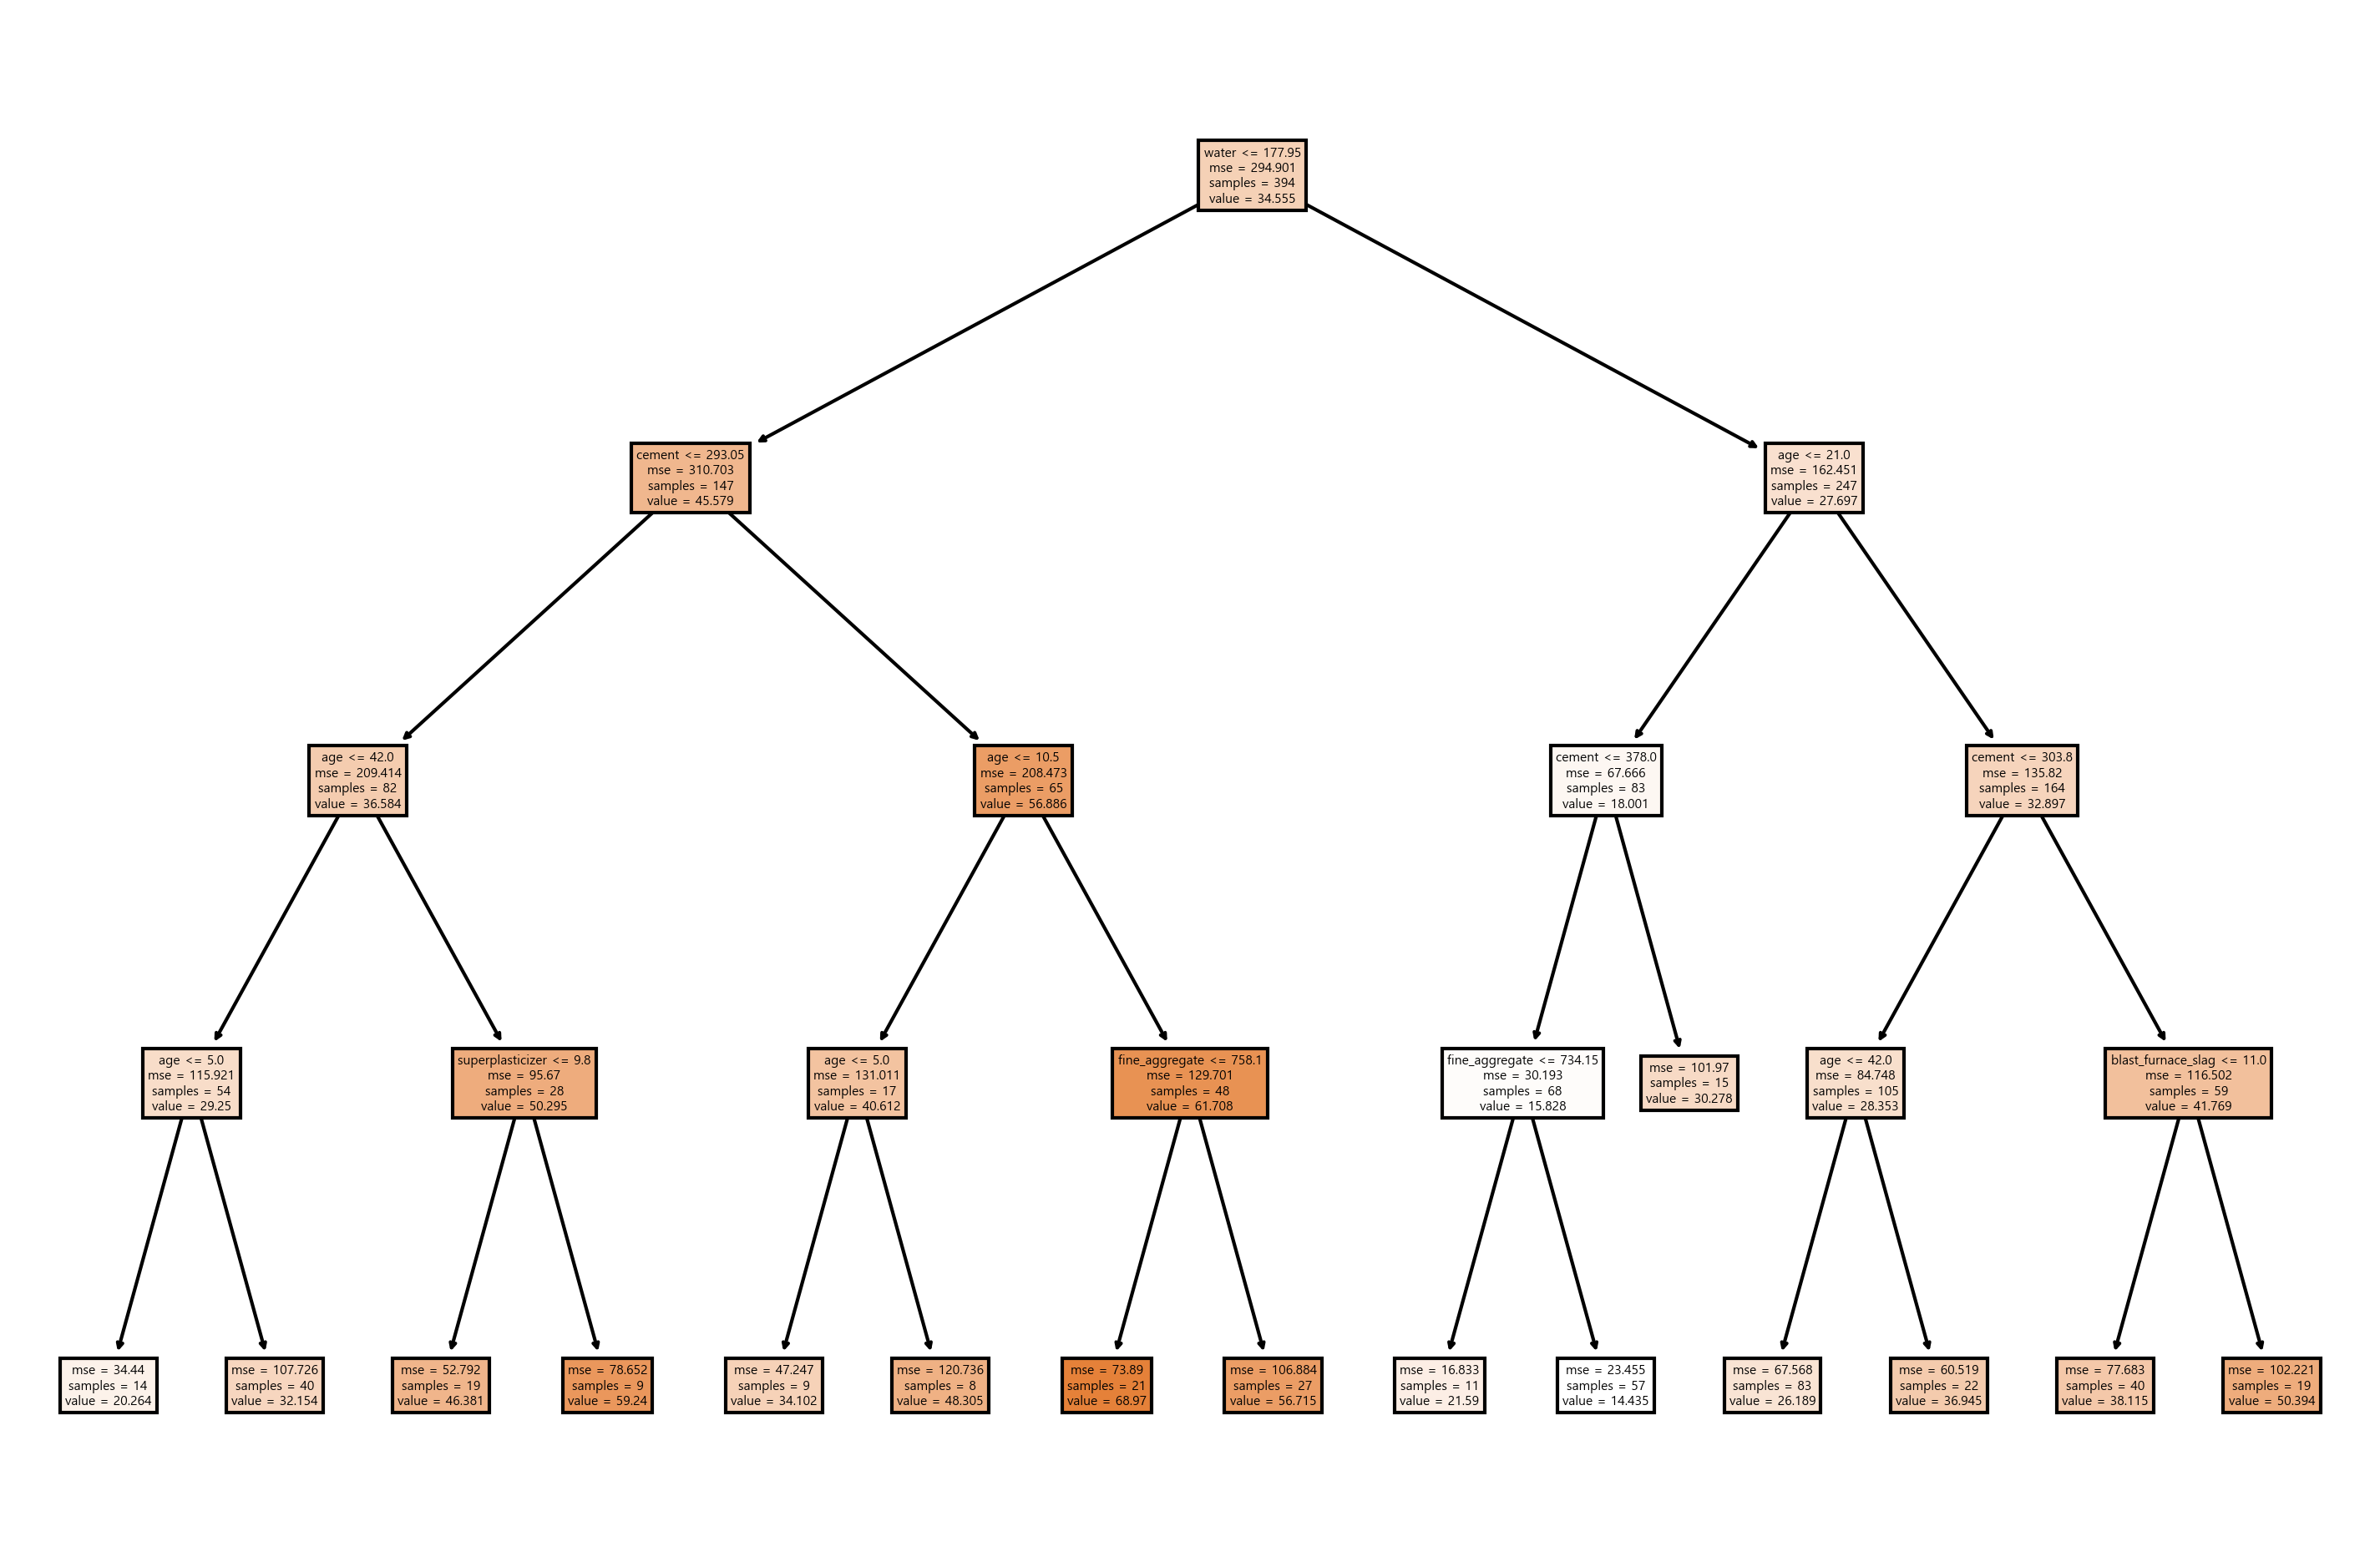

In [33]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[0], feature_names = v_feature_name, filled = True);
# 1번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[1], feature_names = v_feature_name, filled = True);
# 10번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[10], feature_names = v_feature_name, filled = True);

### 결론 도출
##### - feature_importances_ : 설명변수의 중요도

In [34]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,age,0.419
0,cement,0.287
3,water,0.158
4,superplasticizer,0.082
1,blast_furnace_slag,0.021
6,fine_aggregate,0.016
2,fly_ash,0.011
5,coarse_aggregate,0.005


Text(0, 0.5, '변수')

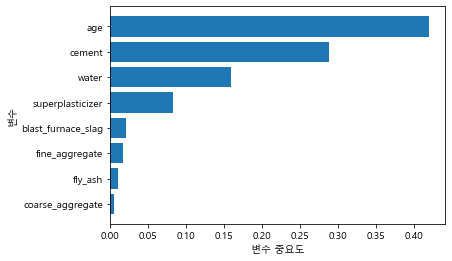

In [35]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

> 설명변수 중요도는 랜덤 포레스트 생성과정에서 분리에 기여한 설명변수의 상대적인 중요도이다.     
  이 모델에서는 **age, cement, water** 순으로 영향이 크다고 해석할 수 있다.  
  즉 이 모델에서 strength(힘)에 영향을 많이 주는 변수는 age(나이), cement(시멘트), water(물)이라는 뜻이다.   
  아까 의사결정나무 모델에서도 비슷한 변수 중요도 순을 보여줬다.  
  하지만, 모델 parameter를 다르게 준다면 설명변수의 중요도는 변할 것이다.      
  그래서 여기서 변수 중요도가 낮다고 해서 의미없는 변수는 아니다.  

#### => 결론
> 모델 parameter 변경 전 score 값
  Score on training set : 0.980, 
  Score on test set : 0.904
  
> 변경 후 score 값
  Score on training set : 0.815, 
  Score on test set : 0.772
  
> **랜덤포레스트의 모델 parameter 잎사귀 노드 최소 자료 수, 분리 노드 최소 자료 수, 최대 깊이, 트리 갯수의 변경을 통해   
training set의 과대적합을 방지하였다고 볼 수 있다. 하지만, train 데이터의 설명력이 떨어진 것에 비례하여   
test 데이터의 결정계수 역시 크게 하락, 설명력이 떨어진 것을 볼 수 있다.   
train 성능과 test 성능의 차이가 감소하였고, 과적합을 방지하였다는 것에서 긍정적인 측면은 있지만 설명력이 떨어진다는 것에서  
불안정한 모델이라고 판단할 수 있다. 그래서 필수적으로 보완 후 비즈니스적으로 이 모델을 사용할 수 있을 것 같다.**  